# 1. Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [ ]:
prices = pd.read_csv('../data/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
cpi = pd.read_csv('../data/CPI.csv')

In [ ]:
prices.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148373 entries, 0 to 148372
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                148373 non-null  object 
 1   town                 148373 non-null  object 
 2   flat_type            148373 non-null  object 
 3   block                148373 non-null  object 
 4   street_name          148373 non-null  object 
 5   storey_range         148373 non-null  object 
 6   floor_area_sqm       148373 non-null  float64
 7   flat_model           148373 non-null  object 
 8   lease_commence_date  148373 non-null  int64  
 9   remaining_lease      148373 non-null  object 
 10  resale_price         148373 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 12.5+ MB


In [ ]:
prices['month'] = pd.to_datetime(prices['month']) # to datetime
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148373 entries, 0 to 148372
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                148373 non-null  datetime64[ns]
 1   town                 148373 non-null  object        
 2   flat_type            148373 non-null  object        
 3   block                148373 non-null  object        
 4   street_name          148373 non-null  object        
 5   storey_range         148373 non-null  object        
 6   floor_area_sqm       148373 non-null  float64       
 7   flat_model           148373 non-null  object        
 8   lease_commence_date  148373 non-null  int64         
 9   remaining_lease      148373 non-null  object        
 10  resale_price         148373 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 12.5+ MB


In [ ]:
cpi['month'] = pd.to_datetime(cpi['month']) # to datetime
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   745 non-null    datetime64[ns]
 1   cpi     745 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.8 KB


# 2. Data Cleaning

In [ ]:
prices['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [ ]:
prices['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [ ]:
prices['block'].unique()

array(['406', '108', '602', ..., '442A', '363A', '494J'], dtype=object)

In [ ]:
prices['street_name'].unique()

array(['ANG MO KIO AVE 10', 'ANG MO KIO AVE 4', 'ANG MO KIO AVE 5',
       'ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 9',
       'ANG MO KIO AVE 8', 'ANG MO KIO AVE 6', 'ANG MO KIO ST 52',
       'BEDOK NTH AVE 4', 'BEDOK NTH AVE 1', 'BEDOK NTH RD',
       'BEDOK STH AVE 1', 'BEDOK RESERVOIR RD', 'CHAI CHEE ST',
       'BEDOK NTH ST 3', 'BEDOK STH RD', 'CHAI CHEE AVE',
       'NEW UPP CHANGI RD', 'CHAI CHEE DR', 'BEDOK STH AVE 2',
       'BEDOK NTH AVE 3', 'BEDOK RESERVOIR VIEW', 'CHAI CHEE RD',
       'LENGKONG TIGA', 'BEDOK CTRL', 'JLN DAMAI', 'BEDOK NTH AVE 2',
       'BEDOK STH AVE 3', 'SIN MING RD', 'SIN MING AVE', 'BISHAN ST 12',
       'BISHAN ST 13', 'BISHAN ST 22', 'BISHAN ST 24', 'BISHAN ST 23',
       'BRIGHT HILL DR', 'SHUNFU RD', 'BT BATOK ST 34', 'BT BATOK ST 51',
       'BT BATOK ST 11', 'BT BATOK ST 52', 'BT BATOK ST 21',
       'BT BATOK EAST AVE 5', 'BT BATOK WEST AVE 6', 'BT BATOK CTRL',
       'BT BATOK WEST AVE 8', 'BT BATOK EAST AVE 4', 'BT BATOK ST 3

In [ ]:
prices['storey_range'].unique()

array(['10 TO 12', '01 TO 03', '04 TO 06', '07 TO 09', '13 TO 15',
       '19 TO 21', '22 TO 24', '16 TO 18', '34 TO 36', '28 TO 30',
       '37 TO 39', '49 TO 51', '25 TO 27', '40 TO 42', '31 TO 33',
       '46 TO 48', '43 TO 45'], dtype=object)

In [ ]:
prices['flat_model'].unique()

array(['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2',
       'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Multi Generation', 'Premium Apartment Loft', '2-room', '3Gen'],
      dtype=object)

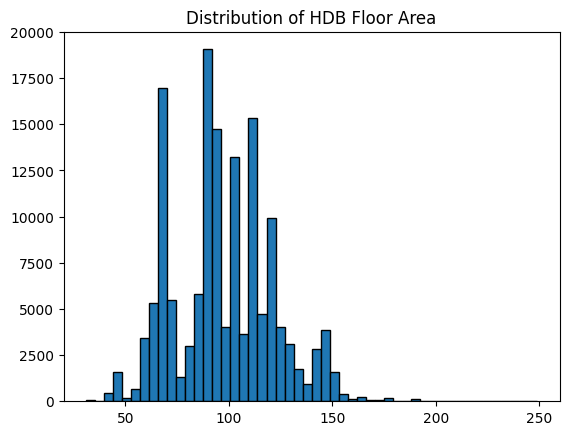

In [ ]:
plt.hist(prices['floor_area_sqm'], bins=50, edgecolor='black')
plt.title('Distribution of HDB Floor Area')
plt.show()
# display(prices[prices['floor_area_sqm'] > 200]['flat_model'].value_counts())

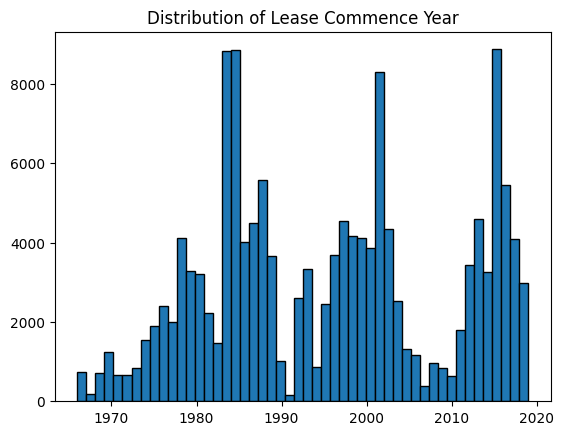

In [ ]:
plt.hist(prices['lease_commence_date'], bins=50, edgecolor='black')
plt.title('Distribution of Lease Commence Year')
plt.show()

In [ ]:
#merge prices data with CPI to adjust for inflation
prices = prices.merge(cpi, on='month', how='left') 
#formula for adjusting for inflation: (actual value/index value) * 100
prices['real_price'] = (prices['resale_price'] / prices['cpi']) * 100
prices.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,cpi,real_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,104.017,223040.464539
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,104.017,240345.328168
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,104.017,251881.903920
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,104.017,254766.047858
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,104.017,254766.047858


In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148373 entries, 0 to 148372
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                148373 non-null  datetime64[ns]
 1   town                 148373 non-null  object        
 2   flat_type            148373 non-null  object        
 3   block                148373 non-null  object        
 4   street_name          148373 non-null  object        
 5   storey_range         148373 non-null  object        
 6   floor_area_sqm       148373 non-null  float64       
 7   flat_model           148373 non-null  object        
 8   lease_commence_date  148373 non-null  int64         
 9   remaining_lease      148373 non-null  object        
 10  resale_price         148373 non-null  float64       
 11  cpi                  145966 non-null  float64       
 12  real_price           145966 non-null  float64       
dtypes: datetime64[

In [ ]:
prices.dropna(inplace=True)
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145966 entries, 0 to 145965
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                145966 non-null  datetime64[ns]
 1   town                 145966 non-null  object        
 2   flat_type            145966 non-null  object        
 3   block                145966 non-null  object        
 4   street_name          145966 non-null  object        
 5   storey_range         145966 non-null  object        
 6   floor_area_sqm       145966 non-null  float64       
 7   flat_model           145966 non-null  object        
 8   lease_commence_date  145966 non-null  int64         
 9   remaining_lease      145966 non-null  object        
 10  resale_price         145966 non-null  float64       
 11  cpi                  145966 non-null  float64       
 12  real_price           145966 non-null  float64       
dtypes: datetime64[

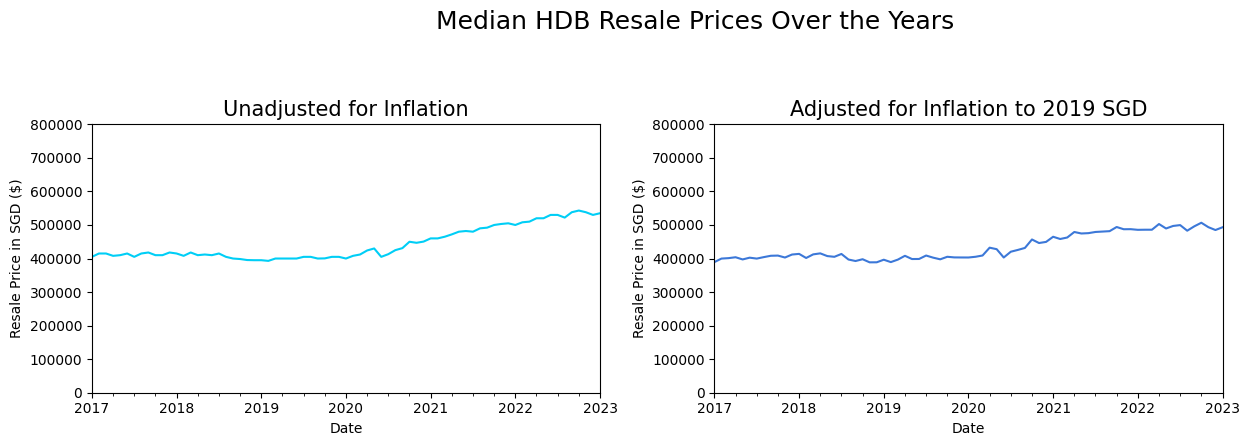

In [ ]:
# Plot Median Resale Prices Over the Years

# Unadjusted
fig = plt.figure(figsize=(14,4.5))
fig.suptitle('Median HDB Resale Prices Over the Years', fontsize=18)
ax1 = fig.add_subplot(121)
prices.groupby('month')[['resale_price']].median().plot(ax=ax1, color='#00cef6', legend=None)
ax1.set_xlabel('Date'), ax1.set_ylabel('Resale Price in SGD ($)'), ax1.set_ylim(0, 800000), ax1.set_title('Unadjusted for Inflation', size=15)

# Adjusted
ax2 = fig.add_subplot(122)
prices.groupby('month')[['real_price']].median().plot(ax=ax2, color='#3c78d8', legend=None)
ax2.set_xlabel('Date'), ax2.set_ylabel('Resale Price in SGD ($)'), ax2.set_ylim(0, 800000), ax2.set_title('Adjusted for Inflation to 2019 SGD',size=15)
plt.tight_layout(rect=[0, 0, 0.9, 0.9]) 
plt.show()

In [ ]:
prices.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,cpi,real_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,104.017,223040.464539
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,104.017,240345.328168
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,104.017,251881.903920
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,104.017,254766.047858
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,104.017,254766.047858


In [ ]:
# Convert remaining_lease to number of years
def getYears(text):
    if isinstance(text, str):
        yearmonth = [int(s) for s in text.split() if s.isdigit()]
        if len(yearmonth) > 1: # if there's year and month
            years = yearmonth[0] + (yearmonth[1]/12)
        else: # if only year
            years = yearmonth[0]
        return years
    else: # if int
        return text

prices['remaining_lease'] = prices['remaining_lease'].apply(lambda x: getYears(x))

In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145966 entries, 0 to 145965
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                145966 non-null  datetime64[ns]
 1   town                 145966 non-null  object        
 2   flat_type            145966 non-null  object        
 3   block                145966 non-null  object        
 4   street_name          145966 non-null  object        
 5   storey_range         145966 non-null  object        
 6   floor_area_sqm       145966 non-null  float64       
 7   flat_model           145966 non-null  object        
 8   lease_commence_date  145966 non-null  int64         
 9   remaining_lease      145966 non-null  float64       
 10  resale_price         145966 non-null  float64       
 11  cpi                  145966 non-null  float64       
 12  real_price           145966 non-null  float64       
dtypes: datetime64[

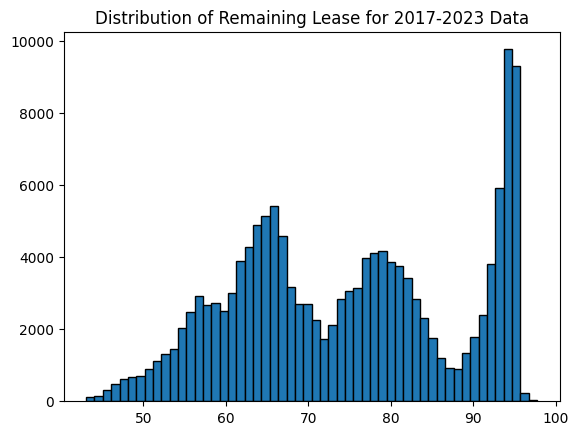

In [ ]:
bins = prices['remaining_lease'].max() - prices['remaining_lease'].min()
plt.hist(prices['remaining_lease'], bins=int(bins), edgecolor='black')
plt.title('Distribution of Remaining Lease for 2017-2023 Data')
plt.show()

# 3. EDA

## 3.1 By Flat Type

In [ ]:
print(prices['flat_type'].value_counts())
print('---------------------------')
print(prices['flat_type'].value_counts(normalize=True))

4 ROOM              60980
5 ROOM              37007
3 ROOM              34259
EXECUTIVE           11343
2 ROOM               2247
MULTI-GENERATION       72
1 ROOM                 58
Name: flat_type, dtype: int64
---------------------------
4 ROOM              0.417769
5 ROOM              0.253532
3 ROOM              0.234705
EXECUTIVE           0.077710
2 ROOM              0.015394
MULTI-GENERATION    0.000493
1 ROOM              0.000397
Name: flat_type, dtype: float64


In [ ]:
drop_flattype = ['1 ROOM', 'MULTI-GENERATION']
prices = prices[prices['flat_type'].isin(drop_flattype) == False]
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145836 entries, 0 to 145964
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                145836 non-null  datetime64[ns]
 1   town                 145836 non-null  object        
 2   flat_type            145836 non-null  object        
 3   block                145836 non-null  object        
 4   street_name          145836 non-null  object        
 5   storey_range         145836 non-null  object        
 6   floor_area_sqm       145836 non-null  float64       
 7   flat_model           145836 non-null  object        
 8   lease_commence_date  145836 non-null  int64         
 9   remaining_lease      145836 non-null  float64       
 10  resale_price         145836 non-null  float64       
 11  cpi                  145836 non-null  float64       
 12  real_price           145836 non-null  float64       
dtypes: datetime64[

## 3.2 By Town

In [ ]:
print(prices['town'].value_counts())
print('---------------------------')
print(prices['town'].value_counts(normalize=True))

SENGKANG           12336
PUNGGOL            10708
WOODLANDS          10134
YISHUN              9938
TAMPINES            9780
JURONG WEST         9694
BEDOK               7868
HOUGANG             7155
CHOA CHU KANG       6699
ANG MO KIO          6108
BUKIT PANJANG       5597
BUKIT MERAH         5559
BUKIT BATOK         4885
TOA PAYOH           4664
PASIR RIS           4524
KALLANG/WHAMPOA     4384
QUEENSTOWN          4161
GEYLANG             3621
SEMBAWANG           3599
CLEMENTI            3340
JURONG EAST         3043
BISHAN              2771
SERANGOON           2737
CENTRAL AREA        1211
MARINE PARADE        936
BUKIT TIMAH          384
Name: town, dtype: int64
---------------------------
SENGKANG           0.084588
PUNGGOL            0.073425
WOODLANDS          0.069489
YISHUN             0.068145
TAMPINES           0.067062
JURONG WEST        0.066472
BEDOK              0.053951
HOUGANG            0.049062
CHOA CHU KANG      0.045935
ANG MO KIO         0.041883
BUKIT PANJANG    

## 3.3 By Storeys

/tmp/ipykernel_17386/4244352414.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)


Text(0.5, 1.0, 'All Years')

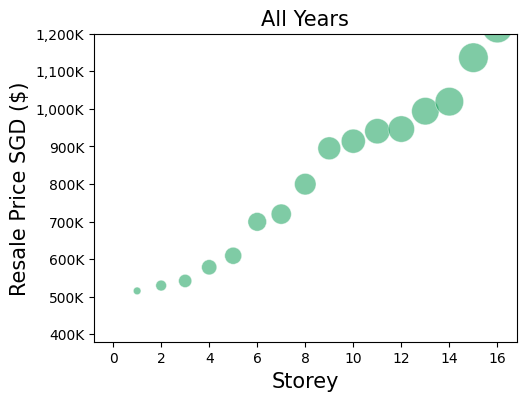

In [ ]:
fig = plt.figure(figsize=(12,4))

# Storey Prices
ax1 = plt.subplot(121)
storey = prices.groupby('storey_range')['real_price'].median().reset_index().sort_values(by='storey_range')
storey['storey_rank'] = storey['storey_range'].astype('category').cat.codes # label encode
a=sns.scatterplot(x=storey['storey_rank'], y=storey['real_price'], s=storey['storey_rank'].astype('int')*30, color='#00994d', edgecolors='w', alpha=0.5, ax=ax1)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
# ax1.set_xticklabels(pd.Series(['']).append(storey.iloc[[0,5,10,15,20,24],0]))
ax1.set_ylim([280000,1100000]), ax1.set_ylabel('Resale Price SGD ($)', size=15), ax1.set_xlabel('Storey', size=15)
ax1.set_title('All Years', size=15)

## 3.4 By Floor Area

/tmp/ipykernel_17386/3896066571.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


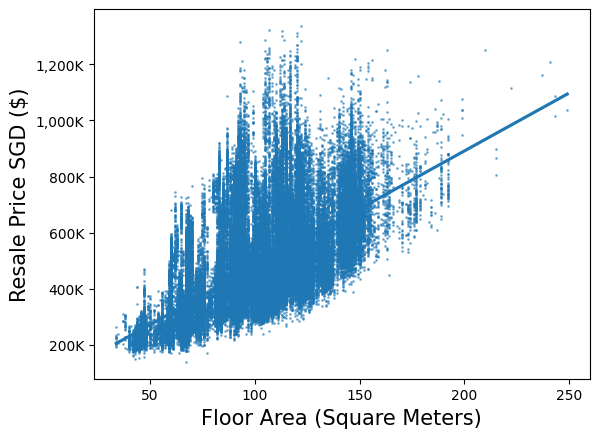

In [ ]:
# Floor Area Prices
p=sns.regplot(x='floor_area_sqm', y='real_price', data=prices, scatter_kws={"s": 1, 'alpha':0.5})
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
p.set_xlabel('Floor Area (Square Meters)', size=15)
plt.show()

In [ ]:
display(prices[prices['floor_area_sqm'] > 200])

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,cpi,real_price
8868,2017-06-01,KALLANG/WHAMPOA,3 ROOM,38,JLN BAHAGIA,01 TO 03,215.0,Terrace,1972,54.083333,830000.0,103.097,8.050671e+05
13949,2017-09-01,CHOA CHU KANG,EXECUTIVE,641,CHOA CHU KANG ST 64,16 TO 18,215.0,Premium Maisonette,1998,79.333333,888000.0,102.393,8.672468e+05
19693,2017-12-01,KALLANG/WHAMPOA,3 ROOM,65,JLN MA'MOR,01 TO 03,249.0,Terrace,1972,53.583333,1053888.0,101.479,1.038528e+06
20828,2018-01-01,CHOA CHU KANG,EXECUTIVE,639,CHOA CHU KANG ST 64,10 TO 12,215.0,Premium Maisonette,1998,79.000000,900000.0,100.274,8.975407e+05
35797,2018-09-01,KALLANG/WHAMPOA,3 ROOM,41,JLN BAHAGIA,01 TO 03,237.0,Terrace,1972,52.833333,1185000.0,101.889,1.163030e+06
90414,2021-03-01,BISHAN,EXECUTIVE,446,BRIGHT HILL DR,07 TO 09,243.0,Maisonette,1990,68.083333,1092888.0,100.503,1.087418e+06
90472,2021-04-01,BISHAN,EXECUTIVE,454,SIN MING AVE,10 TO 12,243.0,Maisonette,1989,67.666667,1001000.0,98.517,1.016068e+06
100929,2021-04-01,KALLANG/WHAMPOA,3 ROOM,61,JLN TENTERAM,01 TO 03,222.0,Terrace,1972,50.250000,1100000.0,98.517,1.116559e+06
101066,2021-06-01,KALLANG/WHAMPOA,3 ROOM,39,JLN BAHAGIA,01 TO 03,210.0,Terrace,1972,50.083333,1268000.0,101.335,1.251295e+06
101318,2021-09-01,KALLANG/WHAMPOA,3 ROOM,46,JLN BAHAGIA,01 TO 03,241.0,Terrace,1972,49.833333,1235000.0,102.169,1.208782e+06


## 3.5 By Flat Model

In [ ]:
print(prices['flat_model'].value_counts())
print('---------------------------')
print(prices['flat_model'].value_counts(normalize=True))

Model A                   48854
Improved                  36336
New Generation            18434
Premium Apartment         16854
Simplified                 5707
Apartment                  5706
Maisonette                 4309
Standard                   4112
DBSS                       2647
Model A2                   1684
Model A-Maisonette          269
Adjoined flat               262
Type S1                     260
Type S2                     147
Premium Apartment Loft       90
Terrace                      86
2-room                       40
Improved-Maisonette          20
Premium Maisonette           14
3Gen                          5
Name: flat_model, dtype: int64
---------------------------
Model A                   0.334993
Improved                  0.249157
New Generation            0.126402
Premium Apartment         0.115568
Simplified                0.039133
Apartment                 0.039126
Maisonette                0.029547
Standard                  0.028196
DBSS                 

In [ ]:
drop_flatmodel = ['3Gen', 'Premium Maisonette',
                  'Improved-Maisonette','Terrace',
                  'Premium Apartment Loft','Type S2',
                  'Type S1','Adjoined flat','Model A-Maisonette']
prices = prices[prices['flat_model'].isin(drop_flatmodel) == False]
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144683 entries, 0 to 145964
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                144683 non-null  datetime64[ns]
 1   town                 144683 non-null  object        
 2   flat_type            144683 non-null  object        
 3   block                144683 non-null  object        
 4   street_name          144683 non-null  object        
 5   storey_range         144683 non-null  object        
 6   floor_area_sqm       144683 non-null  float64       
 7   flat_model           144683 non-null  object        
 8   lease_commence_date  144683 non-null  int64         
 9   remaining_lease      144683 non-null  float64       
 10  resale_price         144683 non-null  float64       
 11  cpi                  144683 non-null  float64       
 12  real_price           144683 non-null  float64       
dtypes: datetime64[

/tmp/ipykernel_17386/1375405964.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


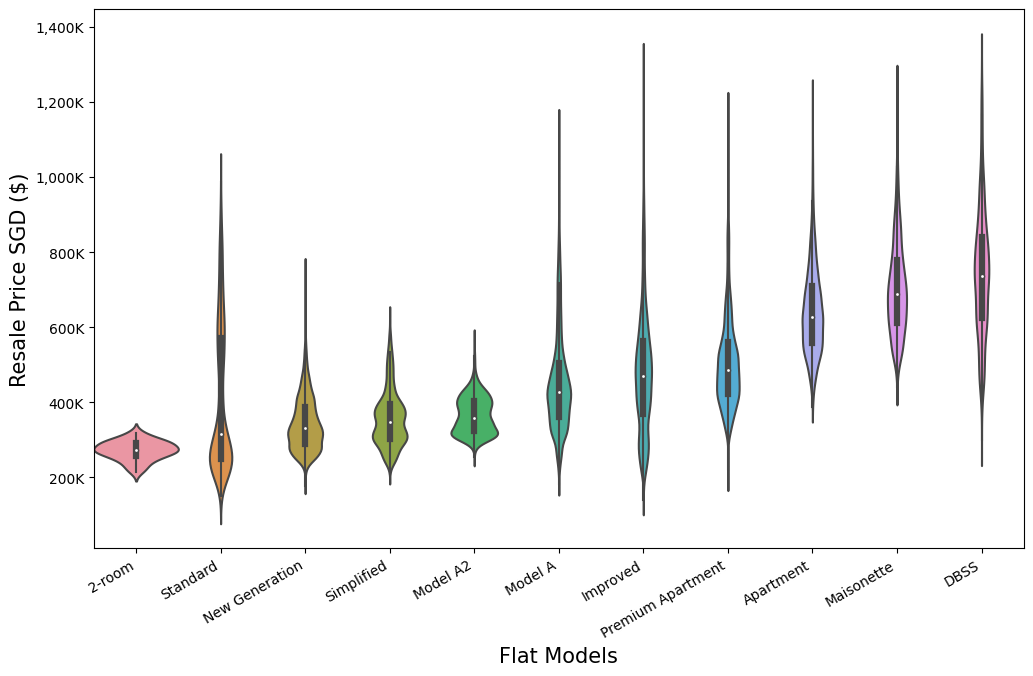

In [ ]:
# Violin plots for price distribution of each flat model

fig = plt.figure(figsize=(12,7))
p=sns.violinplot(x='flat_model', y='real_price', data=prices, width=1,
                order=prices.groupby('flat_model')['real_price'].median().sort_values().reset_index()['flat_model'].tolist())
p.set_xticklabels(p.get_xticklabels(), rotation=30, ha='right'), p.set_xlabel('Flat Models', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
plt.show()


## 3.6 By Lease Commence Date

/tmp/ipykernel_17386/2720458273.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(xlabels)


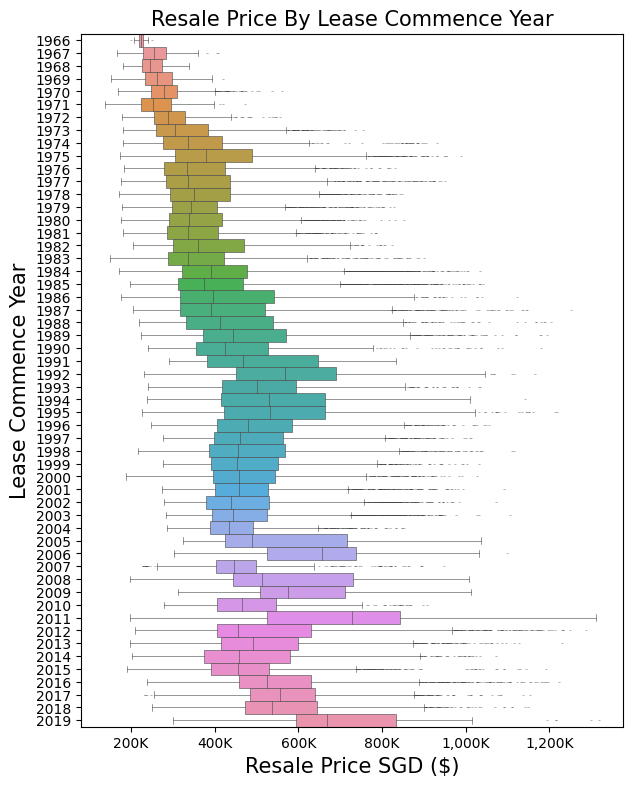

In [ ]:
# Boxplot for each year of lease commence date

fig = plt.figure(figsize=(7,9))
p=sns.boxplot(y='lease_commence_date', x='real_price', data=prices, width=1, orient='h', flierprops = dict(markerfacecolor = 'red', markersize = 0.1, linestyle='none'), linewidth=0.4)
p.set_xlabel('Resale Price SGD ($)', size=15), p.set_ylabel('Lease Commence Year', size=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_xticks()/1000]
p.set_xticklabels(xlabels)
p.set_title('Resale Price By Lease Commence Year', size=15)
plt.show()

# 4. Data Preparation

## 4.1 Missing/Null Values

In [ ]:
prices.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
cpi                    0
real_price             0
dtype: int64

## 4.2 Multicollinearity

/tmp/ipykernel_17386/226848230.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


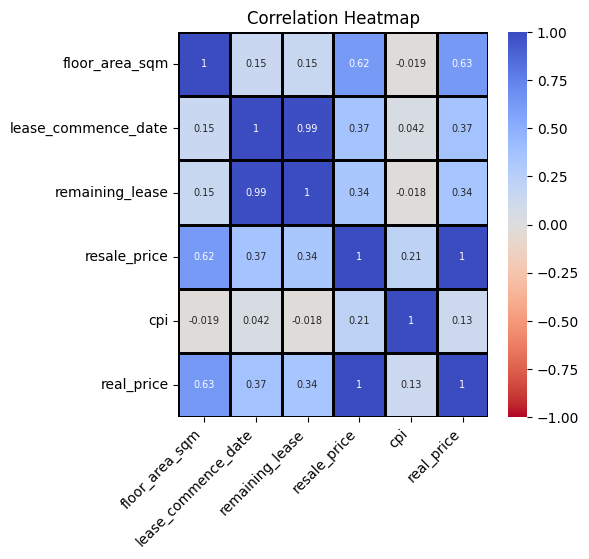

In [ ]:
# Correlation heatmap
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(prices.select_dtypes(include=['int64','float64']).corr(), annot = True, fmt='.2g', 
    vmin=-1, vmax=1, center= 0, cmap= 'coolwarm_r', linecolor='black', linewidth=1, annot_kws={"size": 7})
#ax.set_ylim(0 ,5)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap')
fig.show()

## 4.3 Columns to Keep

In [ ]:
keep_col = ['town', 'flat_type', 'storey_range',
            'floor_area_sqm','flat_model',
            'remaining_lease','real_price']
df = prices[keep_col]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144683 entries, 0 to 145964
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   town             144683 non-null  object 
 1   flat_type        144683 non-null  object 
 2   storey_range     144683 non-null  object 
 3   floor_area_sqm   144683 non-null  float64
 4   flat_model       144683 non-null  object 
 5   remaining_lease  144683 non-null  float64
 6   real_price       144683 non-null  float64
dtypes: float64(3), object(4)
memory usage: 8.8+ MB


## 4.4 Normality

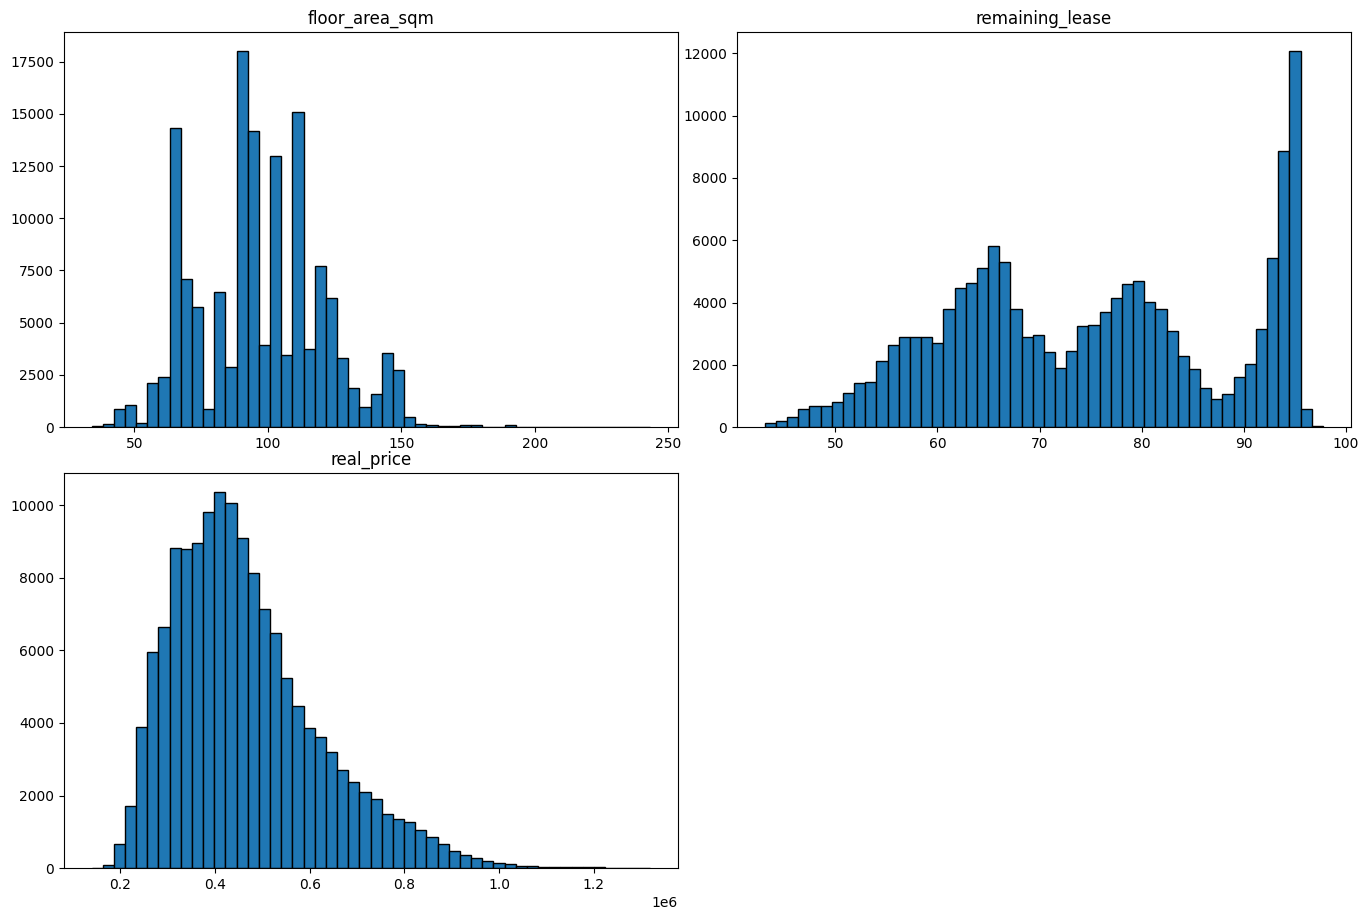

In [ ]:
# Plot distribution for each continuous variable
df.hist(bins=50, figsize=(15, 10), grid=False, edgecolor='black')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

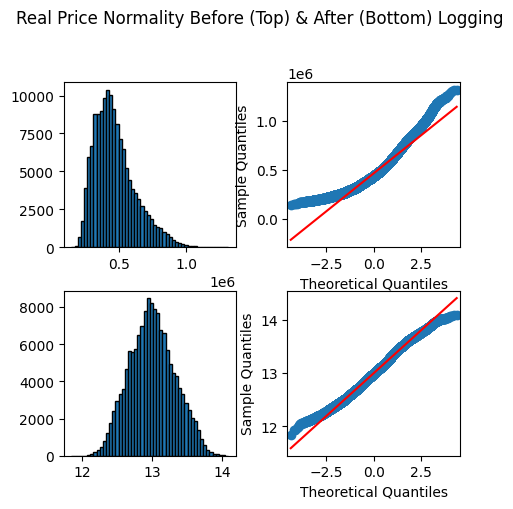

In [ ]:
# plot qqplot before and after log transformation

from statsmodels.api import qqplot
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(5,5))

ax1.hist(df['real_price'], bins=50, edgecolor='black')
qqplot(df['real_price'], line='s', ax=ax2)
ax3.hist(np.log(df['real_price']), bins=50, edgecolor='black')
qqplot(np.log(df['real_price']), line='s', ax=ax4)
plt.suptitle('Real Price Normality Before (Top) & After (Bottom) Logging')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
# plt.show()

## 4.4 Label and Dummy Encoding

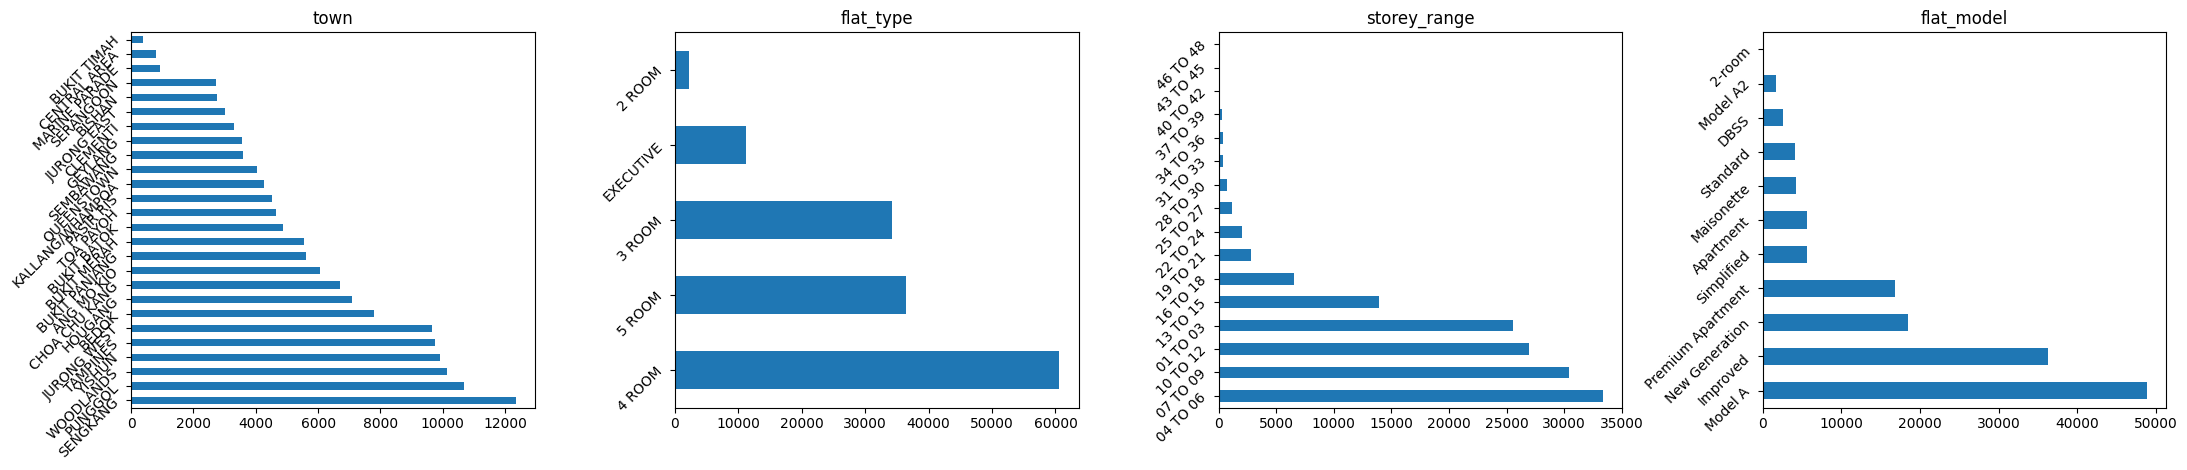

In [ ]:
# Frequency plots for catergorical features
fig = plt.figure(figsize=(30,5))
for count, col in enumerate(df.select_dtypes(include=['category','object']).columns):
    fig.add_subplot(1,5,count+1)
    prices[col].value_counts().plot.barh()
    plt.title(col)
    plt.yticks(rotation=45)
    plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])

# 5. Preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder(sparse=False)  #town, flat_model
oe = OrdinalEncoder() #flat_type, storey_range
scaler = StandardScaler() #floor_area, remaining_lease

In [ ]:
ohe.fit_transform(df[['town', 'flat_model']])

/home/joycetoh/.pyenv/versions/3.10.6/envs/property-wagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
columntransformer = make_column_transformer(
    (ohe, ['town', 'flat_model']),
    (oe, ['flat_type', 'storey_range']),
    (scaler, ['floor_area_sqm', 'remaining_lease'])
)
columntransformer

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(sparse=False,
                                               sparse_output=False),
                                 ['town', 'flat_model']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['flat_type', 'storey_range']),
                                ('standardscaler', StandardScaler(),
                                 ['floor_area_sqm', 'remaining_lease'])])

In [ ]:
target = 'real_price'
X = df.drop(columns=target)
y = (df[target])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115746 entries, 93670 to 123059
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   town             115746 non-null  object 
 1   flat_type        115746 non-null  object 
 2   storey_range     115746 non-null  object 
 3   floor_area_sqm   115746 non-null  float64
 4   flat_model       115746 non-null  object 
 5   remaining_lease  115746 non-null  float64
dtypes: float64(2), object(4)
memory usage: 6.2+ MB


In [ ]:
X_train_encoded = columntransformer.fit_transform(X_train)
X_test_encoded = columntransformer.transform(X_test)

X_train_encoded

/home/joycetoh/.pyenv/versions/3.10.6/envs/property-wagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.22932034,  1.31836303],
       [ 0.        ,  0.        ,  0.        , ...,  4.        ,
        -0.35499282, -0.63834558],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -2.07251672,  1.48346032],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  5.        ,
        -0.18742951,  1.46511618],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.94146439, -0.96242544],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         1.11118612, -0.07579185]])

# 6. Baseline Model

In [ ]:
from sklearn.metrics import mean_squared_error

baseline_mean = np.mean(y_train)
y_baseline_pred = [baseline_mean] * len(y_test)

baseline_mse = np.sqrt(mean_squared_error(y_test, y_baseline_pred))
baseline_mse

156238.60590729854

# 7. Linear Regression Model

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
model_lr = make_pipeline(columntransformer, linreg)

model_lr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False,
                                                                sparse_output=False),
                                                  ['town', 'flat_model']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['flat_type',
                                                   'storey_range']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['floor_area_sqm',
                                                   'remaining_lease'])])),
                ('linearregression', LinearRegression())])

In [ ]:
model_lr.fit(X_train, y_train)

/home/joycetoh/.pyenv/versions/3.10.6/envs/property-wagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False,
                                                                sparse_output=False),
                                                  ['town', 'flat_model']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['flat_type',
                                                   'storey_range']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['floor_area_sqm',
                                                   'remaining_lease'])])),
                ('linearregression', LinearRegression())])

In [ ]:
y_lr_pred = model_lr.predict(X_test)
model_lr_mse = np.sqrt(mean_squared_error(y_test, y_lr_pred))
model_lr_mse


67169.58086021828

In [ ]:
model_lr.score(X_test, y_test)

0.8151669937856525

In [ ]:
import statsmodels.api as sm

X_constant = sm.add_constant(columntransformer.fit_transform(X))
lin_reg = sm.OLS(y, X_constant).fit()
lin_reg.summary()

/home/joycetoh/.pyenv/versions/3.10.6/envs/property-wagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             real_price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                 1.628e+04
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:45:45   Log-Likelihood:            -1.8136e+06
No. Observations:              144683   AIC:                         3.627e+06
Df Residuals:                  144643   BIC:                         3.628e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.85e+05   1984.565    194.007      0.000    3.81e+05    3.89e+05
x1          3.566e+04    944.136     37.766      0.000    3.38e+04    3.75e+04
x2          2.338e+04    802.062     29.155      0.000    2.18e+04     2.5e+04
x3          1.317e+05   1277.841    103.099      0.000    1.29e+05    1.34e+05
x4         -4.418e+04    968.084    -45.632      0.000   -4.61e+04   -4.23e+04
x5          1.425e+05    926.423    153.821      0.000    1.41e+05    1.44e+05
x6         -9.292e+04    921.742   -100.809      0.000   -9.47e+04   -9.11e+04
x7          2.278e+05   3325.470     68.491      0.000    2.21e+05    2.34e+05
x8          1.369e+05   2338.038     58.544      0.000    1.32e+05    1.41e+05
x9         -1.226e+05    850.229   -144.237      0.000   -1.24e+05   -1.21e+05
x10         6.897e+04   1193.282     57.798      0.000    6.66e+04    7.13e+04
x11         7.695e+04   1147.194     67.074      0.000    7.47e+04    7.92e+04
x12         -3.97e+04    816.356    -48.629      0.000   -4.13e+04   -3.81e+04
x13        -3.649e+04   1212.832    -30.091      0.000   -3.89e+04   -3.41e+04
x14        -9.655e+04    720.385   -134.020      0.000    -9.8e+04   -9.51e+04
x15         9.486e+04   1037.558     91.429      0.000    9.28e+04    9.69e+04
x16         1.809e+05   2179.237     83.024      0.000    1.77e+05    1.85e+05
x17        -5.721e+04   1026.514    -55.728      0.000   -5.92e+04   -5.52e+04
x18        -8.184e+04    793.947   -103.085      0.000   -8.34e+04   -8.03e+04
x19         1.508e+05   1088.477    138.556      0.000    1.49e+05    1.53e+05
x20        -1.385e+05   1148.748   -120.554      0.000   -1.41e+05   -1.36e+05
x21        -1.004e+05    714.247   -140.629      0.000   -1.02e+05    -9.9e+04
x22         3.735e+04   1276.475     29.264      0.000    3.49e+04    3.99e+04
x23        -6048.4354    720.930     -8.390      0.000   -7461.445   -4635.426
x24         8.394e+04   1018.346     82.427      0.000    8.19e+04    8.59e+04
x25        -1.187e+05    710.303   -167.064      0.000    -1.2e+05   -1.17e+05
x26        -7.156e+04    719.133    -99.508      0.000    -7.3e+04   -7.02e+04
x27         4.789e+04   9773.826      4.900      0.000    2.87e+04     6.7e+04
x28         3.035e+04   1369.572     22.161      0.000    2.77e+04     3.3e+04
x29         1.391e+05   1596.699     87.141      0.000    1.36e+05    1.42e+05
x30         4302.5009   1015.575      4.237      0.000    2311.993    6293.009
x31         6.971e+04   1453.544     47.959      0.000    6.69e+04    7.26e+04
x32          1.15e+04    979.409     11.738      0.000    9576.766    1.34e+04
x33         6985.8946   1788.659      3.906      0.000    3480.158    1.05e+04
x34         2.115e+04   1115.470     18.960      0.000     1.9e+04    2.33e+04
x35         2.261e+04   1086.920     20.805      0.000    2.05e+04    2.47e+04
x3

/tmp/ipykernel_17386/1234805526.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resids_studentized, norm_hist=True, hist_kws=dict(edgecolor='w'))


Text(0.5, 0, 'Studentized Residual')

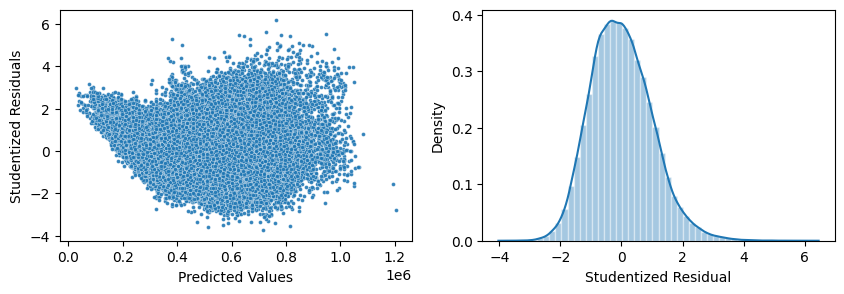

In [ ]:
# Homoscedasticity and Normality of Residuals
pred = lin_reg.predict()
resids = lin_reg.resid
resids_studentized = lin_reg.get_influence().resid_studentized_internal

fig = plt.figure(figsize=(10,3))

ax1 = plt.subplot(121)
sns.scatterplot(x=pred, y=resids_studentized, edgecolors='w', alpha=0.9, s=8)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Studentized Residuals')

ax2 = plt.subplot(122)
sns.distplot(resids_studentized, norm_hist=True, hist_kws=dict(edgecolor='w'))
ax2.set_xlabel('Studentized Residual')

# 8. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
rf = RandomForestRegressor(n_estimators=200)
model_rf = make_pipeline(columntransformer, rf)

model_rf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False,
                                                                sparse_output=False),
                                                  ['town', 'flat_model']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['flat_type',
                                                   'storey_range']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['floor_area_sqm',
                                                   'remaining_lease'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=200))])

In [ ]:
model_rf.fit(X_train, y_train)

/home/joycetoh/.pyenv/versions/3.10.6/envs/property-wagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False,
                                                                sparse_output=False),
                                                  ['town', 'flat_model']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['flat_type',
                                                   'storey_range']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['floor_area_sqm',
                                                   'remaining_lease'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=200))])

In [ ]:
y_rf_pred = model_rf.predict(X_test)
model_rf_mse = np.sqrt(mean_squared_error(y_test, y_rf_pred))
model_rf_mse

42514.6671200219

In [ ]:
cv_results = cross_validate(model_rf, X, y, cv=5, scoring=['neg_root_mean_squared_error', 'r2'])

/home/joycetoh/.pyenv/versions/3.10.6/envs/property-wagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/joycetoh/.pyenv/versions/3.10.6/envs/property-wagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/joycetoh/.pyenv/versions/3.10.6/envs/property-wagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/joycetoh/.pyenv/versions/3.10.6/envs/proper

In [ ]:
cv_results['test_neg_root_mean_squared_error'].mean()

-53124.92137946493

In [ ]:
cv_results['test_r2'].mean()

0.8767189701216586